# **Convolutional Encoder-Decoder Network for Image Restoration (CIFAR-10 Dataset)**
This mini-project aims to see how the convolutional autoencoder performs the noise removal on the noisy image. We have used the CIFAR-10 dataset with Gaussian noise.

In [ ]:
#Keras is a free open source Python library for developing and evaluating deep learning models. 
import keras
# Keras module provides the CIFAR-10 dataset
from keras.datasets import cifar10
from keras import layers
from keras.layers import Reshape
from keras.callbacks import TensorBoard
from keras import callbacks
# Numpy library is used for working with arrays
import numpy as np
# Math library is used foe mathematical task
import math
# Matplotlib is used for data visualization
import matplotlib.pyplot as plt
# Skimage is used for image processing task
from skimage.measure import compare_ssim as ssim

## **Data Load and Pre-processing**

In [ ]:
#loading the MNIST dataset
(train, y_train), (test, y_test) = cifar10.load_data()
max = 255.
train = train.astype('float32') / max
test = test.astype('float32') / max
#image reshape
x = len(train)
y = len(test)
train = np.reshape(train, (x, 32, 32, 3))
test = np.reshape(test, (y, 32, 32, 3))

# 0 is the mean of the normal distribution we are choosing from
# 1 is the standard deviation of the normal distribution
# size of train and test data is the number of elements we get in array noise
noise_factor = 0.1
dumVarTrain = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train.shape) 
train_noisy = train + dumVarTrain
dumVarTest = noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test.shape) 
test_noisy = test + dumVarTest

#Given an interval, values outside the interval are clipped to the interval edges. 
#For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1.
train_noisy = np.clip(train_noisy, 0., 1.)
test_noisy = np.clip(test_noisy, 0., 1.)
print(train.shape)
print(test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## **Noisy Image Visualization**

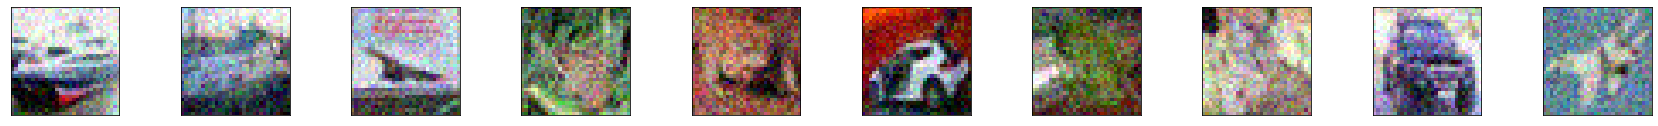

In [ ]:
# visualizing the nosisy image
n = 10
plt.figure(figsize=(30, 2))
for i in range(1, n + 1):
    axis = plt.subplot(1, n, i)
    plt.imshow(test_noisy[i].reshape(32, 32, 3))
    plt.gray()
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
plt.show()

## **Model Building**

In [ ]:
#buliding architecture for autoencoder
input_img = keras.Input(shape=(32, 32, 3))
#enoder
#convolutional layer with 32 3x3 filter
#activation function Relu and Same padding
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
#Downsample the input
x = layers.MaxPooling2D((2, 2), padding='same')(x)
#dropout layer to reduce the overfitting
x = layers.Dropout(0.1)(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

#decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
#Upsample the dimension of the input
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#dropout layer to reduce the overfitting
x = layers.Dropout(0.1)(x)
x = layers.UpSampling2D((2, 2))(x)
#final layer with sigmoid activation function
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

#autoencoder model
autoencoder = keras.Model(input_img, decoded)
#shows the model summary
autoencoder.summary()
#setting the learning rate 0.001
opt = keras.optimizers.Adam(learning_rate=0.001)
#using binary cross entropy loss funcion and adam optimizer
autoencoder.compile(optimizer= opt, loss='binary_crossentropy', metrics=["accuracy"])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          9248  

## **Model Training**

In [ ]:
#setting the early stopping criteria if the loss does not improve in countinous 6 iteration,
#then the model stop traning
callback = callbacks.EarlyStopping(monitor='loss', patience=6)
#Fitting the model for training
#setting epoch size 25 and batch size = 16, and randomly select data for each epoch, one epoch will see all the data 
h = autoencoder.fit(train_noisy, train,
                epochs=25,
                batch_size=16,
                shuffle=True,
                validation_data=(test_noisy, test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False),callback])

Epoch 1/25
3125/3125 [==============================] - 226s 72ms/step - loss: 0.5766 - accuracy: 0.6675 - val_loss: 0.5611 - val_accuracy: 0.7654
Epoch 2/25
3125/3125 [==============================] - 222s 71ms/step - loss: 0.5614 - accuracy: 0.7481 - val_loss: 0.5597 - val_accuracy: 0.7763
Epoch 3/25
3125/3125 [==============================] - 223s 71ms/step - loss: 0.5605 - accuracy: 0.7552 - val_loss: 0.5588 - val_accuracy: 0.7712
Epoch 4/25
3125/3125 [==============================] - 221s 71ms/step - loss: 0.5589 - accuracy: 0.7567 - val_loss: 0.5578 - val_accuracy: 0.7634
Epoch 5/25
3125/3125 [==============================] - 221s 71ms/step - loss: 0.5587 - accuracy: 0.7602 - val_loss: 0.5576 - val_accuracy: 0.7833
Epoch 6/25
3125/3125 [==============================] - 222s 71ms/step - loss: 0.5579 - accuracy: 0.7601 - val_loss: 0.5570 - val_accuracy: 0.7758
Epoch 7/25
3125/3125 [==============================] - 223s 71ms/step - loss: 0.5579 - accuracy: 0.7613 - val_loss: 0

## **Visualizing the Loss graph**

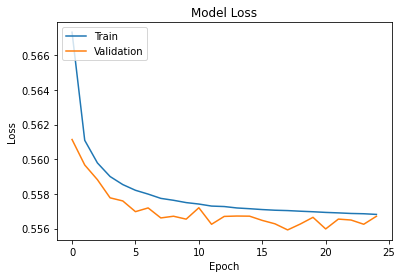

In [ ]:
#Visualizing the grap of training loss and validation loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
#Giving the titel of the graph
plt.title('Model Loss')
#putting the label of the graph
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **Visualizing the accuracy graph**

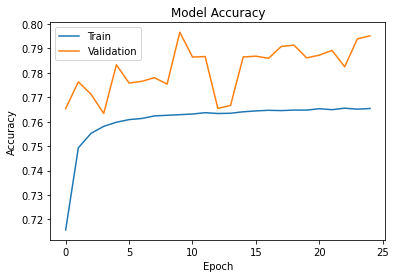

In [ ]:
#Visualizing the grap of training accuracy and validation accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
#Giving the titel of the graph
plt.title('Model Accuracy')
#putting the label of the graph
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **Generate Prediction on test data**

In [ ]:
#predict the result on the unseen noisy data
decodedImg = autoencoder.predict(test_noisy)

## **Visualizing the Nosiy image and the generated image**



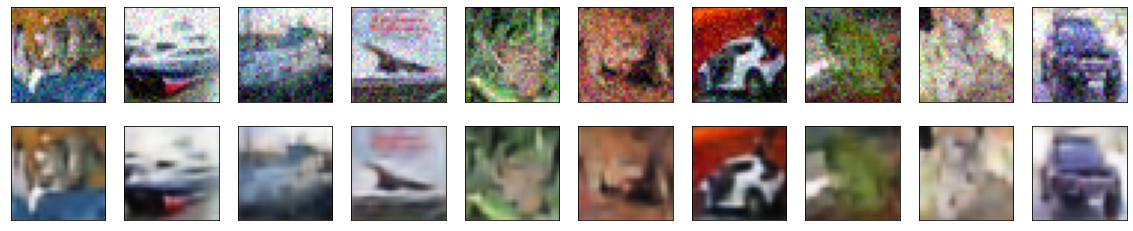

In [ ]:
n = 10  # How many image we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display Noisy image
    axis = plt.subplot(2, n, i + 1)
    plt.imshow(test_noisy[i].reshape(32, 32, 3))
    plt.gray()
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)

    # Display reconstruction
    axis = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodedImg[i].reshape(32, 32, 3))
    plt.gray()
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
plt.show()

## **Visualizing the original image and generated image**

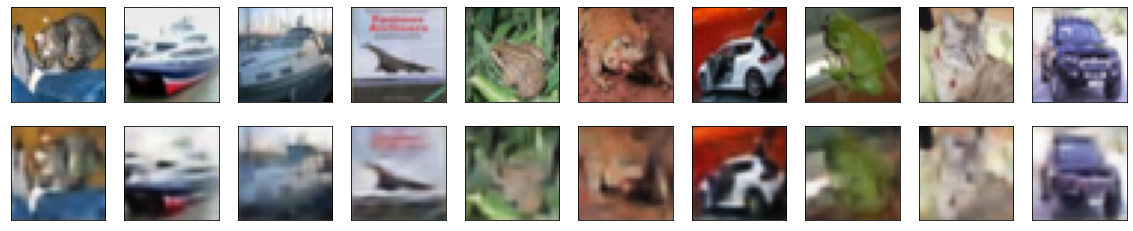

In [ ]:
n = 10  # How many image we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    axis = plt.subplot(2, n, i + 1)
    plt.imshow(test[i].reshape(32, 32, 3))
    plt.gray()
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)

    # Display reconstruction
    axis = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decodedImg[i].reshape(32, 32, 3))
    plt.gray()
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
plt.show()

## **Quality and Similarity Measurement**
We are using PSNR, MSE and SSIM.

### **Define PSNR function**

In [ ]:
#take two images as a input and produce scalar value. The unit is dB.  
def peak_signal_noise_ratio(img1, img2): 
    # assume RGB image
    data1 = img1.astype(float)
    data2 = img2.astype(float)

    #calculating the difference
    diff = data2 - data1

    #make the array dimension into 1
    diff = diff.flatten('C')

    #calculating the root mean square
    rmse = math.sqrt(np.mean(diff ** 2.))
    
    #psnr formula
    psnr = 20 * math.log10(255. / rmse)

    #return the psnr value
    return psnr

### **Define MSE function**

In [ ]:
# define function for mean squared error (MSE)
def mean_square_error(img1, img2):
    # the MSE between the two images is the sum of the squared difference between the two images
    mse = np.sum((img1.astype('float') - img2.astype('float')) ** 2)
    mse /= float(img1.shape[0] * img1.shape[1])

    #return the MSE error
    return mse

### **Comparison function of two images**

In [ ]:
#define the function for comparison
def compareImages(img1, img2):
    value = []
    #PSNR function call
    value.append(peak_signal_noise_ratio(img1, img2))
    #MSE function call
    value.append(mean_square_error(img1, img2))
    #SSIM function call using skimage library
    value.append(ssim(img1, img2, multichannel =True))
    #return the value of PSNR, MSE, and SSIM
    return value

### **Comparing the original and noisy image**

In [ ]:
#orginal vs Noisy
for i in range(10):
  #original image
  original = test[i].reshape(32, 32, 3)
  #noisy image
  noisy = test_noisy[i].reshape(32, 32, 3)
  #calling the compare function for measurement
  scores = compareImages(original, noisy)
  #printing the scores
  print('PSNR: ',scores[0],'MSE: ', scores[1],'SSIM: ', scores[2])

PSNR:  68.1751087042519 MSE:  0.029695507044475343 SSIM:  0.7367522067175042
PSNR:  68.9994252495123 MSE:  0.024561737785114383 SSIM:  0.7789754157939308
PSNR:  68.48449969578365 MSE:  0.027653598050206108 SSIM:  0.731734588023064
PSNR:  68.3985250114655 MSE:  0.02820649443517607 SSIM:  0.7298582632033793
PSNR:  68.3222722925452 MSE:  0.028706112751316494 SSIM:  0.7135739380443357
PSNR:  68.32987720595546 MSE:  0.028655889577012587 SSIM:  0.6684302598716302
PSNR:  69.14274896179742 MSE:  0.023764392647906585 SSIM:  0.8139081511551048
PSNR:  68.29700736865723 MSE:  0.028873596212696036 SSIM:  0.606086128831862
PSNR:  68.12121094236096 MSE:  0.030066337026810195 SSIM:  0.6637214849226895
PSNR:  68.71344364483535 MSE:  0.026233561268501217 SSIM:  0.8130323821705033


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/skimage/metrics/_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)


### **Comparing the original and generated image**

In [ ]:
#orginal vs generated
for i in range(10):
  #original image
  original = test[i].reshape(32, 32, 3)
  #restored image
  restored = decodedImg[i].reshape(32, 32, 3)
  #calling copmare function for measurement
  scores = compareImages(original, restored)
  #printing the scores
  print('PSNR: ',scores[0],'MSE: ', scores[1],'SSIM: ', scores[2])

PSNR:  71.80597157723837 MSE:  0.012870767875275434 SSIM:  0.8649161940791976
PSNR:  72.50868150590334 MSE:  0.010947966630262825 SSIM:  0.8992025930171632
PSNR:  73.13893309433381 MSE:  0.009469091347083913 SSIM:  0.8953855538301724
PSNR:  72.79761709157101 MSE:  0.010243300333861439 SSIM:  0.8751758784796211
PSNR:  71.79949904223702 MSE:  0.012889964205892234 SSIM:  0.8183192646488789
PSNR:  73.42771546788921 MSE:  0.00885992547400797 SSIM:  0.8593714284152228
PSNR:  71.80788908477416 MSE:  0.012865086396951202 SSIM:  0.8996944954953016
PSNR:  74.30383757817482 MSE:  0.007241321967975429 SSIM:  0.8507988196781883
PSNR:  73.56078098501615 MSE:  0.008592578670845076 SSIM:  0.8701882158745929
PSNR:  72.14400019520164 MSE:  0.01190697923010194 SSIM:  0.8904387374713897


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  if __name__ == '__main__':


### **Difference between noisy and generate image**

In [ ]:
#Difference Between Noisy and Generated Image
for i in range(10):
  #original image
  original = test[i].reshape(32, 32, 3)
  #noisy image
  noisy = test_noisy[i].reshape(32,32,3)
  #restored image
  restored = decodedImg[i].reshape(32, 32,3)
  #calling compare function for measurement
  scores = compareImages(original, restored)
  score = compareImages(original, noisy)
  #printing the scores
  print('Diff. PSNR: ',scores[0]-score[0],'Diff. MSE: ', score[1]-scores[1],'Diff. SSIM: ', scores[2]-score[2])

Diff. PSNR:  3.6308628729864694 Diff. MSE:  0.01682473916919991 Diff. SSIM:  0.12816398736169343
Diff. PSNR:  3.5092562563910406 Diff. MSE:  0.013613771154851559 Diff. SSIM:  0.1202271772232324
Diff. PSNR:  4.654433398550154 Diff. MSE:  0.018184506703122195 Diff. SSIM:  0.16365096580710836
Diff. PSNR:  4.399092080105518 Diff. MSE:  0.017963194101314632 Diff. SSIM:  0.14531761527624176
Diff. PSNR:  3.477226749691823 Diff. MSE:  0.01581614854542426 Diff. SSIM:  0.10474532660454328
Diff. PSNR:  5.097838261933759 Diff. MSE:  0.019795964103004618 Diff. SSIM:  0.19094116854359267
Diff. PSNR:  2.6651401229767373 Diff. MSE:  0.010899306250955382 Diff. SSIM:  0.08578634434019672
Diff. PSNR:  6.006830209517588 Diff. MSE:  0.021632274244720605 Diff. SSIM:  0.2447126908463263
Diff. PSNR:  5.439570042655191 Diff. MSE:  0.02147375835596512 Diff. SSIM:  0.2064667309519035
Diff. PSNR:  3.4305565503662905 Diff. MSE:  0.014326582038399276 Diff. SSIM:  0.07740635530088635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/skimage/metrics/_structural_similarity.py:108: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  im2[..., ch], **args)
